# 1

#### En el ejemplo de teoría hemos visto la forma de entrenar utilizando un trozo de datos como en la imagen "way1.png". 

(Básicamente, tener en cuenta más datos de entrenamiento [[20% de test]])

Investiga la forma de realizar el ejercicio a partir del gif "way3_sliding_window.gif":

- ¿Da mejores resultados entrenar el modelo así?

Algo muy típico en el trabajo de data scientist

![](../rnn/sliding_windows_google.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import Callback

import warnings
warnings.filterwarnings('ignore')

/home/jose/.local/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
N = 3000

t = np.arange(0,N)
x = (2*np.sin(0.02*t)*np.sin(0.003*t))+0.5*np.random.normal(size=N)
df = pd.DataFrame(x, columns=['Data'])
len(df)

3000

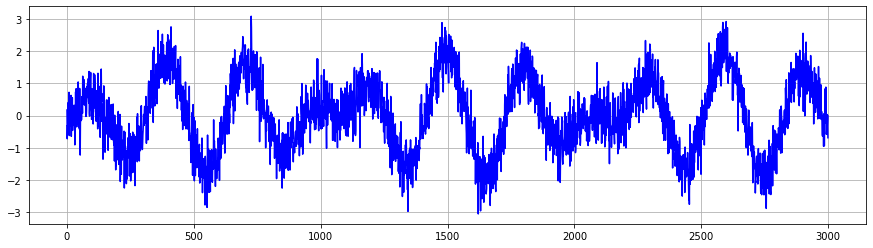

In [3]:
plt.figure(figsize=(15,4))
plt.plot(df, c='blue')
plt.grid(True)
plt.show()

In [4]:
# Dividimos en 5 partes los datos
batch_size = 5
batch_list = [int(N * (i/batch_size)) for i in range(1, 6)]
batch_list

[600, 1200, 1800, 2400, 3000]

In [5]:
def convert_to_matrix(data, step):
    X, Y = [], []
    for i in range(len(data)-step):
        d = i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [6]:
def build_simple_rnn(num_units=128, embedding=4, num_dense=32, lr=0.001):
    
    model = Sequential()
    model.add(SimpleRNN(units=num_units, input_shape=(1, embedding), activation="relu"))
    model.add(Dense(num_dense, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=RMSprop(lr=lr),metrics=['mse'])
    
    return model

In [7]:
model = build_simple_rnn()

In [8]:
batch_size=16
num_epochs = 1000

In [9]:
Tp = int(len(df) * 0.8) 

In [10]:
for batch in batch_list:
    divison = int(batch * 0.8) 
    train, test = df.values[0:divison ,:], df.values[divison:batch, :]

    step = 4
    test = np.append(test, np.repeat(test[-1,],step))
    train = np.append(train, np.repeat(train[-1,],step))
    
    trainX, trainY = convert_to_matrix(train,step)
    testX, testY = convert_to_matrix(test,step)

    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

    model.fit(trainX,trainY, 
        epochs=num_epochs, 
        batch_size=batch_size, 
        verbose=0)

In [13]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicted contiene todo el conjunto de datos predicho por nuestro modelo 
predicted = np.concatenate((trainPredict,testPredict),axis=0)

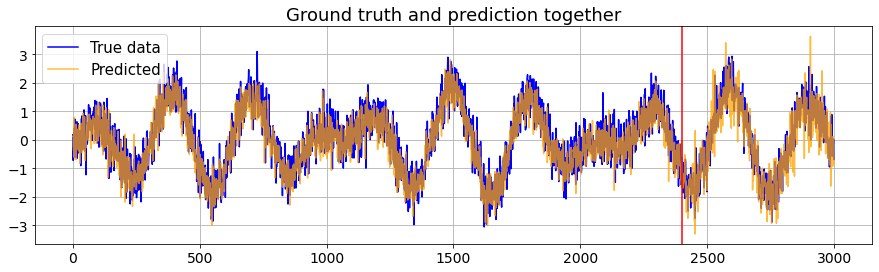

In [14]:
index = df.index.values
plt.figure(figsize=(15,4))
plt.title("Ground truth and prediction together",fontsize=18)
plt.plot(index,df,c='blue')
plt.plot(index,predicted,c='orange',alpha=0.75)
plt.legend(['True data','Predicted'],fontsize=15)
plt.axvline(df.index[Tp], c="r")
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()